# LSTM

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\f

In [2]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import preprocessing

In [3]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


## Data processing
### PM2.5

In [4]:
# Data preparation
df = pd.read_csv('model_data_pi.csv')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.iloc[:138,:]

In [5]:
# Split train & test
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.8)]
test_df = df[int(n*0.8):]

In [6]:
train_df

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,wind_speed_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,...,PM10_pi_t4,wind_speed_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,wind_speed_t5,PM2.5_pi,PM10_pi
0,17.625000,30.933333,4.365000,9.65250,15.223333,9.826088,19.983333,28.125000,4.610000,10.0425,...,15.388333,6.924738,8.316667,53.283333,6.042500,11.798333,17.710000,5.116561,6.641000,9.477000
1,13.990000,35.770000,3.787000,6.64100,9.477000,8.209263,17.625000,30.933333,4.365000,9.6525,...,9.632500,7.421590,13.408333,38.358333,4.840833,10.010000,15.388333,6.924738,10.465000,16.762500
2,12.683333,37.733333,4.529167,10.46500,16.762500,8.496304,13.990000,35.770000,3.787000,6.6410,...,8.284167,6.952755,17.391667,32.191667,5.140833,7.510833,9.632500,7.421590,6.040000,9.553333
3,11.616667,40.350000,2.710000,6.04000,9.553333,7.754637,12.683333,37.733333,4.529167,10.4650,...,15.750000,11.269782,18.650000,30.083333,3.752500,6.064167,8.284167,6.952755,7.147500,10.535000
4,10.425000,42.900000,3.815000,7.14750,10.535000,6.162207,11.616667,40.350000,2.710000,6.0400,...,15.223333,9.826088,19.983333,28.125000,4.610000,10.042500,15.750000,11.269782,7.878333,12.093333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,10.900000,54.850000,1.635000,4.46000,7.517500,25.050413,8.680000,64.740000,1.561000,4.1460,...,6.784286,19.959720,9.587500,81.237500,1.951250,4.691250,7.617500,18.118410,4.378000,7.250000
92,11.800000,47.660000,1.707000,4.37800,7.250000,25.325686,10.900000,54.850000,1.635000,4.4600,...,5.693333,20.969805,9.214286,77.042857,1.467143,4.021429,6.784286,19.959720,3.917000,6.415000
93,14.530000,43.370000,1.583000,3.91700,6.415000,24.130743,11.800000,47.660000,1.707000,4.3780,...,7.005000,22.253124,8.733333,73.666667,1.033333,3.258333,5.693333,20.969805,4.705000,7.891000
94,14.900000,41.120000,1.754000,4.70500,7.891000,24.842607,14.530000,43.370000,1.583000,3.9170,...,6.938000,24.858253,8.287500,69.487500,1.362500,4.062500,7.005000,22.253124,4.438750,6.758750


In [7]:
labels = ['PM2.5_pi', 'PM10_pi']

In [8]:
X_train = train_df.drop(train_df[labels], axis=1)
X_train.head()

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,wind_speed_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,...,PM1_pi_t4,PM2.5_pi_t4,PM10_pi_t4,wind_speed_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,wind_speed_t5
0,17.625000,30.933333,4.365000,9.6525,15.223333,9.826088,19.983333,28.125000,4.610000,10.0425,...,4.840833,10.010000,15.388333,6.924738,8.316667,53.283333,6.042500,11.798333,17.710000,5.116561
1,13.990000,35.770000,3.787000,6.6410,9.477000,8.209263,17.625000,30.933333,4.365000,9.6525,...,5.140833,7.510833,9.632500,7.421590,13.408333,38.358333,4.840833,10.010000,15.388333,6.924738
2,12.683333,37.733333,4.529167,10.4650,16.762500,8.496304,13.990000,35.770000,3.787000,6.6410,...,3.752500,6.064167,8.284167,6.952755,17.391667,32.191667,5.140833,7.510833,9.632500,7.421590
3,11.616667,40.350000,2.710000,6.0400,9.553333,7.754637,12.683333,37.733333,4.529167,10.4650,...,4.610000,10.042500,15.750000,11.269782,18.650000,30.083333,3.752500,6.064167,8.284167,6.952755
4,10.425000,42.900000,3.815000,7.1475,10.535000,6.162207,11.616667,40.350000,2.710000,6.0400,...,4.365000,9.652500,15.223333,9.826088,19.983333,28.125000,4.610000,10.042500,15.750000,11.269782


In [9]:
y_train1 = train_df['PM2.5_pi']
y_train2 = train_df['PM10_pi']

In [10]:
y_train1 = y_train1.to_frame()
y_train2 = y_train2.to_frame()

In [11]:
X_test = test_df.drop(test_df[labels], axis=1)
X_test.head()

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,wind_speed_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,...,PM1_pi_t4,PM2.5_pi_t4,PM10_pi_t4,wind_speed_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,wind_speed_t5
110,6.658333,67.450000,2.165000,5.520833,9.129167,3.415260,6.881818,64.036364,3.126364,7.047273,...,2.994000,6.236000,9.613000,5.760000,8.600000,58.325000,4.621667,10.125000,15.913333,6.034700
111,6.150000,68.733333,3.752500,6.378333,8.960833,1.138420,6.658333,67.450000,2.165000,5.520833,...,2.192000,5.787000,9.666000,6.479999,8.000000,62.700000,2.994000,6.236000,9.613000,5.760000
112,5.716667,68.983333,4.670833,8.175833,11.664167,4.104631,6.150000,68.733333,3.752500,6.378333,...,2.192000,5.787000,9.666000,6.638072,7.430000,62.450000,2.192000,5.787000,9.666000,6.479999
113,5.436364,70.918182,3.436364,7.400000,11.557273,2.520000,5.716667,68.983333,4.670833,8.175833,...,3.126364,7.047273,11.187273,5.937272,7.430000,62.450000,2.192000,5.787000,9.666000,6.638072
114,6.166667,69.291667,3.610833,5.735833,7.756667,1.440000,5.436364,70.918182,3.436364,7.400000,...,2.165000,5.520833,9.129167,3.415260,6.881818,64.036364,3.126364,7.047273,11.187273,5.937272


In [12]:
y_true1 = test_df['PM2.5_pi']
y_true2 = test_df['PM10_pi']

y_true1 = y_true1.to_frame()
y_true2 = y_true2.to_frame()

In [33]:
X_val = val_df.drop(test_df[labels], axis=1)

y_val1 = val_df['PM2.5_pi']
y_val2 = val_df['PM10_pi']
y_val1 = y_val1.to_frame()
y_val2 = y_val2.to_frame()

### Scaling of trainset

In [13]:
# X scaling
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
print(X_train.shape)

# y1 scaling
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train1)
scaled_y_train1 = Yscaler.transform(y_train1)
print(scaled_y_train1.shape)
scaled_y_train1 = scaled_y_train1.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train1.shape)

# y2 scaling
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train2)
scaled_y_train2 = Yscaler.transform(y_train2)
print(scaled_y_train2.shape)
scaled_y_train2 = scaled_y_train2.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train2.shape)


(96, 36)
(96, 1)
(96,)
(96, 1)
(96,)


In [14]:
scaled_y_train1 = np.insert(scaled_y_train1, 0, 0)
scaled_y_train1 = np.delete(scaled_y_train1, -1)

scaled_y_train2 = np.insert(scaled_y_train2, 0, 0)
scaled_y_train2 = np.delete(scaled_y_train2, -1)

In [16]:
n_input = 1 #how many samples/rows/timesteps to look in the past in order to forecast the next sample 
n_features= X_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train1, length=n_input, batch_size=b_size) 

print(generator[0][0].shape)

'''Question: Since the dataset is already reconstructed as 'timeseries' data, I just put 'n_input=1'. Is it reasonable?''' 

(1, 1, 36)


### Scaling of validation set

In [ ]:
scaled_X_val = Xscaler.transform(X_val)
val_generator = TimeseriesGenerator(scaled_X_val, np.zeros(len(X_val)), length=n_input, batch_size=b_size)
print(val_generator[0][0].shape)

In [ ]:
# y_val1 scaling
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_val1)
scaled_y_val1 = Yscaler.transform(y_val1)
print(scaled_y_val1.shape)
scaled_y_val1 = scaled_y_val1.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_val1.shape)

scaled_y_val1 = np.insert(scaled_y_val1, 0, 0)
scaled_y_val1 = np.delete(scaled_y_val1, -1)

In [ ]:
val_generator = TimeseriesGenerator(scaled_X_val, scaled_y_val1, length=n_input, batch_size=b_size)
print(val_generator[0][0].shape)

### Scaling of test set 

In [ ]:
# Only X required
scaled_X_test = Xscaler.transform(X_test)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=n_input, batch_size=b_size)
print(test_generator[0][0].shape)

## Model

In [41]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               112200    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 112,351
Trainable params: 112,351
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit_generator(generator,epochs=30,validation_data=val_generator)

''' Question: Since the dataset is small, I thougth the augmentation is necessary. According to the documents, 'fit_generator' is more sutiable than 'fit' if the data augementation is required. I'd like to kindly ask whether this is correct.'''

''' Question2: is the validation set correctly implemented? Still doubt it..'''

Epoch 1/30
95/95 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.2293
Epoch 2/30
95/95 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.2551
Epoch 3/30
95/95 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.1804
Epoch 4/30
95/95 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.2189
Epoch 5/30
95/95 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.2842
Epoch 6/30
95/95 [==============================] - 1s 5ms/step - loss: 0.0059 - val_loss: 0.2242
Epoch 7/30
95/95 [==============================] - 0s 5ms/step - loss: 0.0052 - val_loss: 0.2074
Epoch 8/30
95/95 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 0.2342
Epoch 9/30
95/95 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.2268
Epoch 10/30
95/95 [==============================] - 0s 5ms/step - loss: 0.0052 - val_loss: 0.2317
Epoch 11/30
95/95 [

' Question: How to add validation dataste?\nmodel.fit_generator(generator, epochs=30, )'

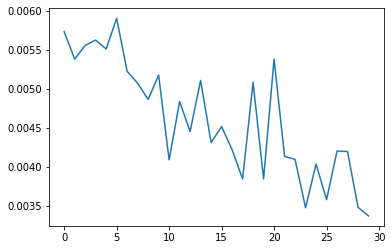

In [49]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [51]:
y_pred_scaled = model.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)
results = pd.DataFrame({'y_true1':test_df['PM2.5_pi'].values[n_input:],'y_pred':y_pred.ravel()})
print(results)

      y_true1    y_pred
0    8.175833  5.401207
1    7.400000  5.792404
2    5.735833  6.272453
3    5.347273  6.123603
4    4.264000  5.854687
5    3.856667  6.446616
6    5.673000  6.504642
7    4.440000  6.245478
8    4.829091  6.193013
9    7.077500  5.629176
10   7.685000  5.399809
11   6.626364  5.006869
12   8.286667  5.127824
13   9.799167  5.117236
14   9.512500  4.669920
15   9.767500  4.818861
16   7.718333  6.007197
17   5.473636  6.962052
18   5.647500  6.430236
19   7.613636  5.901704
20   7.039167  6.066048
21   6.749167  6.160557
22   7.871667  5.384850
23   5.710833  5.721455
24   7.948333  5.882920
25  10.420000  5.606012
26   6.582727  5.913537


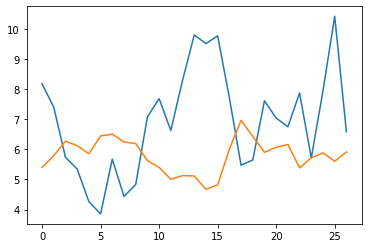

In [52]:
plt.plot(results)

In [53]:
y_true1= test_df['PM2.5_pi'].values[n_input:]
y_pred1 = y_pred.ravel()

print("MSE: ", mean_squared_error(y_true1, y_pred1))
print("MAE: ", mean_absolute_error(y_true1, y_pred1))

MSE:  5.928036811536729
MAE:  2.006067806552155
